# Retriving Data from the Web

* We don't always have to download data to our local machines before loading it into Python
* If the data are openly available on the web we can retrieve them programmatically
    * We can even log into systems with access control, but that is a more complicated topic
* Getting remote data requires the use of *web protocols* to GET data


## What is HTTP

* HTTP is the *HyperText Transfer Protocol* and is the lingua franca of the web
 > HTTP is a protocol which allows the fetching of resources, such as HTML documents. It is the foundation of any data exchange on the Web and a client-server protocol, which means requests are initiated by the recipient, usually the Web browser. A complete document is reconstructed from the different sub-documents fetched, for instance text, layout description, images, videos, scripts, and more. - [MDN Web Docs](https://developer.mozilla.org/en-US/docs/Web/HTTP/Overview)

![HTTP Flow](images/http-flow.png)

## Elements of HTTP

* Request Methods - Verbs
    * GET - Requests a representation of a specific resource. Retrieve only.
    * POST - Submit an entity to a specified resource, often causing a change in state on the server.
    * PUT - Replace the current representation of the specified resource with the request payload.
    * DELETE - Remove the specified resource from the server.
    * HEAD - Same as GET, but without the response body.
* User Agent - Information about the application making the request
* Headers - Metadata about the request
* Body - Data sent or received


## HTTP Status Codes

* HTTP has five categories of status code
    * 1xx: informational – used for development
    * 2xx: Successful response
    * 3xx: Redirection
    * 4xx: Client Error
    * 5xx: Server Error
* Frequently used codes:
    * 200 - success
    * 301 and 302 - Moved permanently or temporarily
    * 400 - bad request
    * 401 - unauthorized
    * 403 - forbidden
    * 404 - not found


## HTTP Request & Response

![HTTP Request and Response](images/http-request-response.png)

## Working with HTTP in Python

* Because Python has the *batteries included* there is an [http client module](https://docs.python.org/3/library/http.client.html) as part of the standard library
    * It is fine in a pinch, but there is a better 3rd party library
* The [Requests](https://2.python-requests.org/en/master/) library by [Kenneth Reitz](https://www.kennethreitz.org/)
    * It is *HTTP for humans*
* Requests is the most popular library for fetching data from the web
* It is very powerful, but we will only touch on a little bit of it today.

In [4]:
# load the requests library
import requests

In [15]:
# put the address of the page we want to load into a variable
URL = "http://loc.gov"

# make an HTTP GET request to the specified URL
# Save the response in a variable
response = requests.get(URL)


In [16]:
# Inspect the response status code
response.status_code

200

* This means tour HTTP request was successful 
* Requests makes it easy to inspect various bits of information related to our HTTP transaction

In [17]:
# Display the HTTP headers we got from the server
response.headers

{'Date': 'Fri, 17 May 2019 20:36:20 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-Frame-Options': 'allow-from https://unitedstateslibraryofcongress.marketing.adobe.com', 'Expires': 'Fri, 17 May 2019 17:53:13 GMT', 'Cache-Control': 'no-transform, max-age=3600', 'Age': '0', 'Expect-CT': 'max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"', 'Server': 'cloudflare', 'CF-RAY': '4d886205dd1fa409-PIT', 'Content-Encoding': 'gzip'}

In [30]:
# Look at the content type of the resource we got back from the server
response.headers['Content-Type']

'text/html; charset=UTF-8'

* This means we got an HTML document back from loc.gov
* You can access the response body in the `response.text` or `response.content` fields
    * Be careful, They can be really long!

In [28]:
# display the first 5000 characters of the response string
response.text[0:1000]

'<!DOCTYPE html>\n\n\n<html lang="en" class="no-js" prefix="lc: http://loc.gov/#">\n<head>\n\n<meta name="description"\n      content="The Library of Congress is the nation\'s oldest federal cultural institution, and it serves as the research arm of Congress. It is also the largest library in the world, with more than 162 million items. The collections include books, sound recordings, motion pictures, photographs, maps, and manuscripts." />\n\n<meta name="dc.identifier"\n      content="http://www.loc.gov/" />\n\n<meta rel="canonical"\n      href="http://loc.gov/" />\n\n    \n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width,initial-scale=1"/>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="version" content="$Revision: 81937 $"/>\n<meta name="msvalidate.01" content="5C89FB9D99590AB2F55BD95C3A59BD81"/>\n<link title="schema(DC)" rel="schema.dc" href="http://purl.org/dc/elements/1.1/"/>\n<meta name="dc.language" content="eng" />\n<meta name="dc.s

In [29]:
# use the print function so the newlines aren't escaped
print(response.text[0:1000])

<!DOCTYPE html>


<html lang="en" class="no-js" prefix="lc: http://loc.gov/#">
<head>

<meta name="description"
      content="The Library of Congress is the nation's oldest federal cultural institution, and it serves as the research arm of Congress. It is also the largest library in the world, with more than 162 million items. The collections include books, sound recordings, motion pictures, photographs, maps, and manuscripts." />

<meta name="dc.identifier"
      content="http://www.loc.gov/" />

<meta rel="canonical"
      href="http://loc.gov/" />

    
<meta charset="utf-8">
<meta name="viewport" content="width=device-width,initial-scale=1"/>
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="version" content="$Revision: 81937 $"/>
<meta name="msvalidate.01" content="5C89FB9D99590AB2F55BD95C3A59BD81"/>
<link title="schema(DC)" rel="schema.dc" href="http://purl.org/dc/elements/1.1/"/>
<meta name="dc.language" content="eng" />
<meta name="dc.source" content="Library o

* From here we could use a library like [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse the HTML and extract specific pieces of information

In [31]:
from bs4 import BeautifulSoup

In [58]:
# Grab the HTML page for the digitized books collection
url = "https://loc.gov/collections/selected-digitized-books"
response = requests.get(url)

In [59]:
# Parse the HTML string with BeautifulSoup so we can search it
soup = BeautifulSoup(response.text)

# find all the HTML elements with the titles
span_elements = soup.findAll("span", class_="item-description-title")

# Use a list comprehension to extract just the text from each HTML element
titles = [item.text.strip() for item in span_elements]
# Display the list of title strings
titles

['Conversations on natural philosophy, in which the elements of that science are familiarly explained, and adapted to the comprehension of young pupils.',
 "An examination of Mr. Dufief's philosophical notions, with a criticism upon his system and mode of teaching languages, in four letters.",
 'Philosophical views.',
 'Hypnotism as it is; a book for everybody.',
 'New illustrated self-instructor in phrenology and physiology, with over one hundred engravings together with the chart and character of.',
 'Psukikos; philosophic observations on the relations of the ganglio-nervous system to the immaterial soul of man.',
 'The mind; an introductory lecture, delivered November 4th, 1875.',
 'Scientific explanation of the creed crusher, or spiritual mill, for pulverizing creeds.',
 'What is spiritualism? And shall spiritualists have a creed? In two lectures.',
 'The trance, and correlative phenomena.',
 'Posthumous memoirs of Helena Petrovna Blavatsky,',
 'Improvement of the mind.',
 'Mental 

* But we don't have to parse these titles from HTML
* LC has provided a *much easier* way of programmatically accessing information

In [50]:
# Grab the JSON for the digital book collection
url = "https://loc.gov/collections/selected-digitized-books/?fo=json"
response = requests.get(url)

In [51]:
response.status_code

200

In [52]:
response.headers["Content-Type"]

'application/json'

In [54]:
response.text[0:1000]

'{"digitized": 575, "next_sibling": null, "views": {"list": "https://www.loc.gov/collections/selected-digitized-books/?fo=json", "brief": "https://www.loc.gov/collections/selected-digitized-books/?fo=json&st=brief", "slideshow": "https://www.loc.gov/collections/selected-digitized-books/?fo=json&st=slideshow", "current": "list", "grid": "https://www.loc.gov/collections/selected-digitized-books/?fo=json&st=grid", "gallery": "https://www.loc.gov/collections/selected-digitized-books/?fo=json&st=gallery"}, "facet_views": {"current": "list", "calendar": "https://www.loc.gov/collections/selected-digitized-books/?fo=json&fs=calendar", "list": "https://www.loc.gov/collections/selected-digitized-books/?fo=json", "chart": "https://www.loc.gov/collections/selected-digitized-books/?fo=json&fs=chart"}, "topics": ["General"], "research-centers": ["general-collections"], "expert_resources": [{"url": "//www.loc.gov/rr/askalib/", "title": "Ask a Librarian"}, {"url": "/books/collections/", "title": "Coll

* That looks like JSON!

In [57]:
collection = response.json()
titles = [item['title'] for item in collection['results']]
titles

['Conversations on natural philosophy, in which the elements of that science are familiarly explained, and adapted to the comprehension of young pupils.',
 "An examination of Mr. Dufief's philosophical notions, with a criticism upon his system and mode of teaching languages, in four letters.",
 'Philosophical views.',
 'Hypnotism as it is; a book for everybody.',
 'New illustrated self-instructor in phrenology and physiology, with over one hundred engravings together with the chart and character of.',
 'Psukikos; philosophic observations on the relations of the ganglio-nervous system to the immaterial soul of man.',
 'The mind; an introductory lecture, delivered November 4th, 1875.',
 'Scientific explanation of the creed crusher, or spiritual mill, for pulverizing creeds.',
 'What is spiritualism? And shall spiritualists have a creed? In two lectures.',
 'The trance, and correlative phenomena.',
 'Posthumous memoirs of Helena Petrovna Blavatsky,',
 'Improvement of the mind.',
 'Mental 

## Using HTTP Parameters with Requests

* This time we are going to use some HTTP parameters to search for certain items
* What we want to search for are images of kittens
    * CUTE!

In [27]:
# Specify the search endpoint and criteria
search_endpoint = 'http://www.loc.gov/search/'
parameters = {
    'fo' : 'json',
    'q'  : 'kittens',
    'fa' : 'online-format:image'
}

* Now that we have our query as python data, we can pass these to requests

In [28]:
# make the request with the additional parameters
response = requests.get(search_endpoint, params = parameters)

print('URL:',response.url)
print('Response code:',response.status_code)
for header, value in response.headers.items():
    print('Header:', header, value)

URL: https://www.loc.gov/search/?fo=json&q=kittens&fa=online-format%3Aimage
Response code: 200
Header: Date Wed, 22 May 2019 23:34:27 GMT
Header: Content-Type application/json
Header: Content-Length 18324
Header: Connection keep-alive
Header: ETag "d15f74404b5a7f3c2e1b7abbc6d6b16e"
Header: access-control-allow-origin *
Header: X-Frame-Options allow-from https://unitedstateslibraryofcongress.marketing.adobe.com
Header: Expires Thu, 23 May 2019 23:09:46 GMT
Header: Content-Encoding gzip
Header: Accept-Ranges bytes
Header: Cache-Control no-transform, max-age=86400
Header: Age 0
Header: Expect-CT max-age=604800, report-uri="https://report-uri.cloudflare.com/cdn-cgi/beacon/expect-ct"
Header: Server cloudflare
Header: CF-RAY 4db299d33b99956c-IAD


In [29]:
# parse the response into Python dictionaries
kitten_data = response.json()
# look at the first result
kitten_data['results'][0]

{'access_restricted': False,
 'aka': ['http://www.loc.gov/pictures/collection/hec/item/2016892679/',
  'http://www.loc.gov/item/2016892679/',
  'http://www.loc.gov/pictures/item/2016892679/',
  'http://hdl.loc.gov/loc.pnp/hec.43433',
  'http://www.loc.gov/resource/hec.43433/',
  'http://lccn.loc.gov/2016892679'],
 'campaigns': [],
 'contributor': ['harris & ewing'],
 'date': '1923',
 'dates': ['1923-01-01T00:00:00Z'],
 'description': ['1 negative : glass ; 4 x 5 in. or smaller'],
 'digitized': True,
 'extract_timestamp': '2018-05-03T19:32:52.021Z',
 'group': ['hec', 'catalog', 'harris-ewing', 'main-catalog'],
 'hassegments': False,
 'id': 'http://www.loc.gov/item/2016892679/',
 'image_url': ['//cdn.loc.gov/service/pnp/hec/43400/43433_150px.jpg#h=116&w=150',
  '//cdn.loc.gov/service/pnp/hec/43400/43433t.gif#h=116&w=150',
  '//cdn.loc.gov/service/pnp/hec/43400/43433r.jpg#h=496&w=640',
  '//cdn.loc.gov/service/pnp/hec/43400/43433v.jpg#h=793&w=1024'],
 'index': 1,
 'language': ['english'],

* If we look at this result we can see there are some URLs the 
* [//cdn.loc.gov/service/pnp/hec/43400/43433v.jpg#h=793&w=1024](//cdn.loc.gov/service/pnp/hec/43400/43433v.jpg#h=793&w=1024)
* Can we programmatically access this image using Python?
    * The answer is YES!

In [31]:
# Extract the URL from the JSON data
kitten_url = kitten_data['results'][0]['image_url'][-1]
kitten_url

'//cdn.loc.gov/service/pnp/hec/43400/43433v.jpg#h=793&w=1024'

In [32]:
# make a request for the image 
# We need to prepend http to the URL because requests doesn't like the protocol agnostics URLs
response = requests.get("http:" + kitten_url)
# Check to make sure we got JPEG data back
response.headers['content-type']

'image/jpeg'

* Now we have the JPEG image of a kitten, lets look at it!!!

In [33]:
# Dispay the content
response.content[0:1000]

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xc0\x00\x0b\x08\x03\x19\x04\x00\x01\x01\x11\x00\xff\xc4\x00\x1e\x00\x00\x01\x03\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x04\x06\x07\x00\x02\x03\x08\t\x01\n\xff\xc4\x00S\x10\x00\x01\x03\x02\x05\x02\x04\x04\x03\x06\x04\x06\x01\x00\x00\x17\x01\x02\x03\x11\x04\x05\x00\x06\x12!1\x07A\x08\x13"Q\t\x14aq2\x81\x91\x15#B\xa1\xb1\xf0\nR\xc1\xd1\x16$3b\xe1\xf1\x17r\x18%4C\x82\x19\x92\xa2c&Ss\x83\xc2\xe25DTU\xa3\xb2\xd2\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xf9\xff\x00\xc5b\xb1X\xac?3\xef\x85\xaf\x13}+\xc8\x94=Q\xea\x87\x87\\\xf5\x96\xf2\xcd\xd2\xaf\xe5m\x99\x86\xff\x00\x94\xab(\xe8\xab\x1f\x87\x0f\x96\xd3\xef6\x948\xb8i\xdfJI?\xbb_\xf9L1\n\x16\x9eRG\xdcb\xa0\xfb\x1cy\x8a\x

* EEK, that is not a cute kitten picture, that is binary data being barfed into plain text
* We need a mechanism for displaying this raw image data not as text but as an image
    * Jupyter provides mechanisms for doing this because we are running in an web browser

In [34]:
# load up the Jupyter/IPython display library
from IPython import display

* This imports a function that renders JPEG image data as a JPEG image
    * See the [documentation](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.display_jpeg) for more information 
* Jupyter supports a bunch of different formats including 

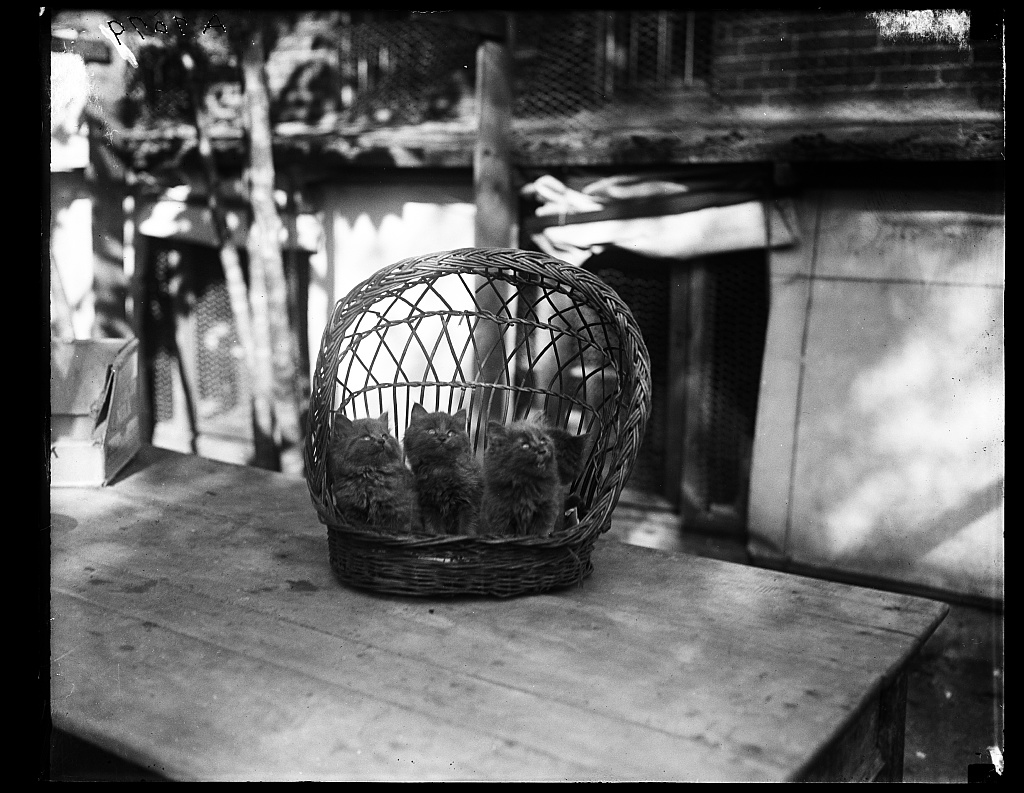

In [35]:
# Use the display function to render the JPEG image we downloaded in the notebook
display.display_jpeg(response.content, raw=True)

***KITTENS!!!***